<a href="https://colab.research.google.com/github/smanthrala/python-notebooks/blob/main/week2_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

import tensorflow as tf

# Keras Sequential Model
from tensorflow.keras.models import Sequential

# Importing all the different layers and optimizers
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Activation, LeakyReLU
from tensorflow.keras.optimizers import Adam,SGD

# The below code can be used to ignore the warnings that may occur due to deprecations
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import tensorflow as tf
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [ ]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

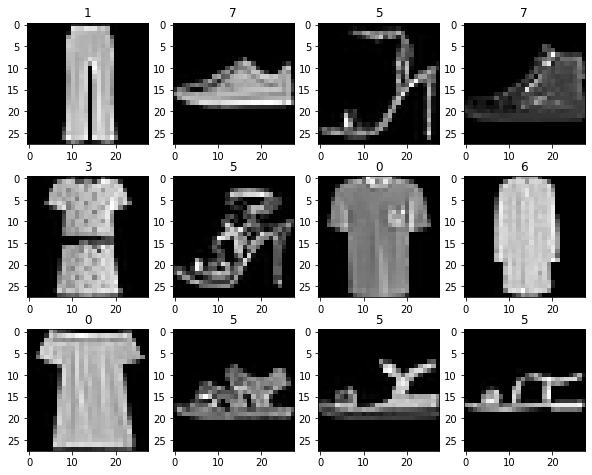

In [ ]:
num_classes=10                                                                  # Number of Classes
categories=np.unique(y_train)                                                   # Obtaing the unique classes from y_train
rows = 3                                                                        # Defining number of rows=3
cols = 4                                                                        # Defining number of columns=4
fig = plt.figure(figsize=(10, 8))                                               # Defining the figure size to 10x8
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(y_train))                       # Generating random indices from the data and plotting the images
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)                      # Adding subplots with 3 rows and 4 columns
        ax.imshow(X_train[random_index, :], cmap=plt.get_cmap('gray'))          # Plotting the image using cmap=gray
        ax.set_title(categories[y_train[random_index]])
plt.show()

In [ ]:
# Reshape dataset to have a single channel
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

In [ ]:
# Normalizing the image pixels
X_train_normalized = X_train.astype('float32')/255.0
X_test_normalized = X_test.astype('float32')/255.0

In [ ]:
# Creating one-hot encoded representation of target labels
# We can do this by using this utility function - https://www.tensorflow.org/api_docs/python/tf/keras/utils/to_categorical
# to_categorical() function is also explained in the Neural Networks Module

y_train_encoded = tf.keras.utils.to_categorical(y_train)
y_test_encoded = tf.keras.utils.to_categorical(y_test)

In [ ]:
y_train_encoded.shape

(60000, 10)

In [ ]:
import random
np.random.seed(1) #for numpy
random.seed(1) 
tf.random.set_seed(1) #for tensorflow

In [ ]:
# Intializing a sequential model
model = Sequential()

# Adding first conv layer with 64 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension of MNIST images
model.add(Conv2D(64, (3, 3), activation='relu', padding="same", input_shape=(28, 28, 1)))

# Adding max pooling to reduce the size of output of first conv layer
model.add(MaxPooling2D((2, 2), padding = 'same'))

# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model.add(Flatten())

# Adding a fully connected dense layer with 100 neurons    
model.add(Dense(100, activation='relu'))

# Adding the output layer with 10 neurons and activation functions as softmax since this is a multi-class classification problem  
model.add(Dense(10, activation='softmax'))

# Using SGD Optimizer
opt = Adam()

# Compile model
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 12544)             0         
                                                                 
 dense_2 (Dense)             (None, 100)               1254500   
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 1,256,150
Trainable params: 1,256,150
Non-trainable params: 0
____________________________________________

In [ ]:
history_1 = model.fit(
            X_train_normalized, y_train_encoded,
            epochs=5
)

Epoch 1/5
1875/1875 [==============================] - 50s 26ms/step - loss: 0.3866 - accuracy: 0.8629
Epoch 2/5
1875/1875 [==============================] - 48s 26ms/step - loss: 0.2582 - accuracy: 0.9062
Epoch 3/5
1875/1875 [==============================] - 47s 25ms/step - loss: 0.2151 - accuracy: 0.9213
Epoch 4/5
1875/1875 [==============================] - 48s 26ms/step - loss: 0.1827 - accuracy: 0.9326
Epoch 5/5
1875/1875 [==============================] - 46s 25ms/step - loss: 0.1528 - accuracy: 0.9434


In [ ]:
accuracy = model.evaluate(X_test_normalized, y_test_encoded, verbose=2)

313/313 - 2s - loss: 0.2592 - accuracy: 0.9130 - 2s/epoch - 6ms/step


In [ ]:
accuracy

[0.2592177391052246, 0.9129999876022339]